In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Panel D <br>
Data required: uniprot domains, whole gene affinities

In [3]:
cancer_genes = [x.strip() for x in open('/cellar/users/ramarty/Data/hla/git_data/data/tumor_suppressor_genes.txt').readlines()] + [x.strip() for x in open('/cellar/users/ramarty/Data/hla/git_data/data/onco_genes.txt').readlines()]

In [5]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/uniprot_domains.tab', sep='\t')
df.columns = ['Entry', 'Status', 'Length', 'DNA', 'Active', 'Binding', 'Domain_cc', 'Domain_ft', 'gene']
df = df[df.gene.isin(cancer_genes)]
df = df.drop_duplicates('gene')
df = df[['DNA', 'Active', 'Binding', 'Domain_cc', 'Domain_ft', 'gene']]

In [8]:
in_domain, out_domain = [], []
for row in df.iterrows():
    print row[1]['gene']
    gene = row[1]['gene']
    matrix = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/gene_affinities/{0}.all.PHBR.txt'.format(gene), index_col=0)
    p = matrix.median(axis=1).reset_index()
    p.columns = ['residue', 'score']
    
    try:
        domains = row[1]['Domain_ft']
        domains = [[float(j) for j in y.split()[1:3]] for y in domains.split(';')]
        
        in_residues = []
        for r in domains:
            in_residues.extend(range(int(r[0]), int(r[1]+1)))

        i = p[p.residue.isin(in_residues)].score
        o = p[~p.residue.isin(in_residues)].score
        print sp.mannwhitneyu(i, o)
        in_domain.extend(i)
        out_domain.extend(o)
        
    except:
        print 'no domains'

HLA-A
MannwhitneyuResult(statistic=10977.0, pvalue=0.057881054683732183)
HLA-B
MannwhitneyuResult(statistic=11441.0, pvalue=0.27012980380074725)
ACADS
no domains
ACVR1B
MannwhitneyuResult(statistic=30373.0, pvalue=0.00078094962911381266)
PPP2R1A
no domains
MLLT4
MannwhitneyuResult(statistic=249834.5, pvalue=4.2395531345619799e-29)
ALK
MannwhitneyuResult(statistic=250926.0, pvalue=6.9666111880278828e-12)
GOT2
no domains
CDKN2A
no domains
GNAS
no domains
AKT1
MannwhitneyuResult(statistic=4376.0, pvalue=1.848969521223159e-10)
AOAH
MannwhitneyuResult(statistic=17402.0, pvalue=3.8561493325630826e-05)
AJUBA
MannwhitneyuResult(statistic=20889.0, pvalue=4.808420573463783e-13)
ATRX
MannwhitneyuResult(statistic=259927.0, pvalue=8.1151110672663449e-64)
APC
no domains
AQP2
no domains
ARID2
MannwhitneyuResult(statistic=35854.0, pvalue=6.0372095803878996e-20)
ARF4
no domains
ASXL1
no domains
ARID1B
MannwhitneyuResult(statistic=84575.5, pvalue=0.0039715516240779649)
ARID1A
MannwhitneyuResult(statisti

In [9]:
frame = pd.DataFrame({'score': in_domain + out_domain, 'domain': ['in' for x in in_domain] + ['out' for x in out_domain]})

In [12]:
sp.mannwhitneyu(frame[frame.domain == 'in'].score, frame[frame.domain == 'out'].score)

MannwhitneyuResult(statistic=1230466294.5, pvalue=0.0)

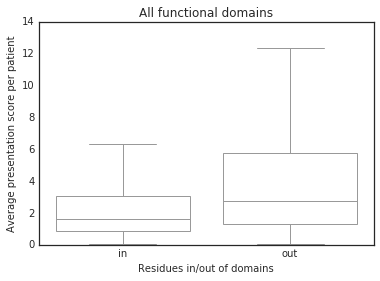

In [13]:
sns.boxplot(x='domain', y='score', data=frame, showfliers=False, color='white')
plt.ylabel('Average presentation score per patient')
plt.xlabel('Residues in/out of domains')
plt.title('All functional domains')
plt.savefig('/cellar/users/ramarty/Data/hla/git_data/figures/domains.pdf')
#plt.ylim(0, 6)

## Panel E

In [7]:
total_residues = len(in_domain) + len(out_domain)
residue_distribution = pd.DataFrame({'Fraction': [float(len(in_domain))/total_residues, float(len(out_domain))/total_residues],
                                     'Category': ['In Domain', 'Out of Domain']})

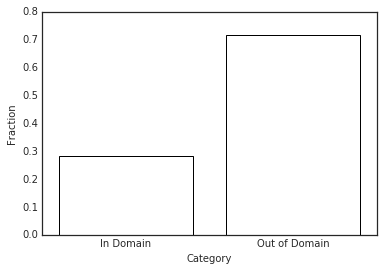

In [8]:
sns.barplot(x='Category', y='Fraction', data=residue_distribution, color='white')